# COMP24111 - Exercise 3: _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [16]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces

Now you can load the data:

In [17]:
data, labels = load_data()

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

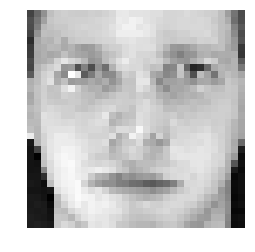

In [18]:
# Display a single example.
show_single_face(data[0, :])

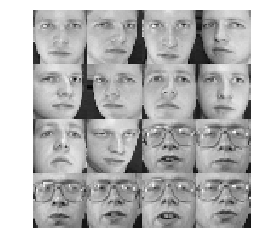

In [19]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [20]:
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [21]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)


def l2_rls_train(tr_data, tr_labels, lambdav
                ):
    """
    A summary of your function goes here.
    
    
    1. Calculate the expanded feature matrix
    2. Then use this to calculate w as w = the transpose of the expanded feature matrix multiplied by the output (y)
    

    data: type and description of "data"
    labels: type and description of "labels"

    Returns: type and description of the returned variable(s).
    
    
  
    """
    
    
    # This is just to be consistent with the lecture notes.
    X, y = tr_data, tr_labels
    

    # Expand X with a column of ones.

    X_tilde = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

    
    if lambdav == 0:
        w = np.linalg.pinv(X_tilde) @ y
    else:
        lambdaEYE = lambdav * np.identity(X_tilde.shape[1])
        # Compute the coefficient vector.
        
        xtildeT_xtilde = X_tilde.T @ X_tilde
        xtildeT_y = X_tilde.T @ y
        w = np.linalg.inv(xtildeT_xtilde + lambdaEYE) @ xtildeT_y
    

    
    # Return model parameters.
    return w



Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [22]:
def l2_rls_predict(w, data, # Add any other arguments here
                  ):
    """
    A summary of your function goes here.

    data: type and description of "data"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X = data
    X_tilde = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    
    
    predicted_y = X_tilde @ w
    
    return predicted_y

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [23]:
def exp1(label_class_1, label_class_30):
    
    # Map the labels and partition the data
    labelsc_1 = labels[:10]
    labelsc_30 = labels[290:300]

    # Make the array of 1's and 30's
    new_labels130 = np.append(labelsc_1, labelsc_30)
    
    # Change the -1/1's for 1's and 30's
    new_labelsMinus1 = np.where(new_labels130==1, label_class_1, new_labels130)
    new_labelsMinus1and1 = np.where(new_labelsMinus1==30, label_class_30, new_labelsMinus1)
    
    # Get the testing indices for samples in 1 and 30 then shift the samples to work
    num_per_class = 3
    tr_ind, te_ind = partition_data(new_labels130, num_per_class)


    
    #print("------------------------------ SHIFTING THE INDICES---------")
    tr_ind[3:] += 280
    te_ind[7:] += 280
    #print("Training labels are after the shift", labels[tr_ind])
    #print("Testing labels are after the shift", labels[te_ind])
    #print("TRAINING INDICES ARE", tr_ind)
    #print("TESTING INDICES ARE", te_ind)
     
    

    # Train your model ----------------------------------------- WITH W
    tr_labels = labels[tr_ind]
    tr_labels = np.where(tr_labels==1, label_class_1, label_class_30)
    #print("Training Labels With Binary Change is:", tr_labels)
    tr_data = data[tr_ind, :]
    
    w = l2_rls_train(tr_data, tr_labels, 0)

    
    # Define the threshold
    T = (label_class_1 + label_class_30) / 2
    
    
    # TRAINING
    #print("------------------------------ TRAINING---------")
    #pprint(labels[tr_ind])
    tr_predicted = l2_rls_predict(w, tr_data)
    #pprint("Predicted Without Binary", tr_predicted)
    
    
    
    
    tr_predictedBinary = np.where(tr_predicted>T, label_class_30, label_class_1)
    #print("Predicted With Binary Output: ", tr_predictedBinary)
    
    tr_expectedLabels = np.where(tr_labels==1, label_class_1, label_class_30)
    #print("EXPECTED With Binary Output: ", tr_predictedBinary)

    tr_errors = np.sum(tr_predictedBinary != tr_predictedBinary)
    #print(tr_errors)
    #print("Errors via training test: ", tr_errors)

    
    ## TESTING
    #print("------------------------------ TESTING---------")
    #print(labels[te_ind])
    te_labels = labels[te_ind]
    te_data = data[te_ind]

    te_predicted = l2_rls_predict(w, te_data)
    #print("Predicted without Binary ", te_predicted)
    
    # Get the predicted values and change the valuues either side of the trheshold
    te_predictedBinary = np.where(te_predicted>T, label_class_30, label_class_1)
    
    #print("Predicted With Binary Output: ", te_predictedBinary)
    
    te_expectedLabels = np.where(te_labels==1, label_class_1, label_class_30)
    
    #print("Expected Binary Output: ", te_expectedLabels)
    
    
    #print("Now comparing (predicted y): ", te_predictedBinary, "With (actual):", te_expectedLabels)
    te_errors = (np.sum(te_predictedBinary != te_expectedLabels))
    #print("Errors via testing:", te_errors)
    
    
    
    return (tr_errors/6), (te_errors/14)


In [24]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.

threeClassifiersMeans = []
threeClassifiersStd = []

tr_array = []
te_array = []
for x in range(50):
    tr_result, te_result = exp1(-1, 1)
    tr_array.append(tr_result)
    te_array.append(te_result)
    
print("Training Errors ", tr_array)
print("Testing Errors ",te_array)    
print("Training Errors Mean", np.mean(tr_array))
classifier1Mean = np.mean(te_array)
classifier1Std = np.std(te_array)
print("Testing Errors Mean", classifier1Mean)
threeClassifiersMeans.append(classifier1Mean)
threeClassifiersStd.append(classifier1Std)
    



Training Errors  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Testing Errors  [0.07142857142857142, 0.0, 0.21428571428571427, 0.07142857142857142, 0.0, 0.07142857142857142, 0.14285714285714285, 0.0, 0.21428571428571427, 0.0, 0.21428571428571427, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.14285714285714285, 0.07142857142857142, 0.21428571428571427, 0.14285714285714285, 0.21428571428571427, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.14285714285714285, 0.14285714285714285, 0.21428571428571427, 0.0, 0.14285714285714285, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.21428571428571427, 0.21428571428571427, 0.14285714285714285, 0.14285714285714285, 0.07142857142857142, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.07142857142857142, 0.0, 0.14285714285714285]
Training Errors Mean 0.0
Testing E

Repeat the same experiment for classifier 2.

In [25]:
tr_array = []
te_array = []
for x in range(50):
    tr_result, te_result = exp1(0, 1)
    tr_array.append(tr_result)
    te_array.append(te_result)
    
print("Training Errors ", tr_array)
print("Testing Errors ",te_array)    
print("Training Errors Mean", np.mean(tr_array))
classifier2Mean = np.mean(te_array)
classifier2Std = np.std(te_array)
print("Testing Errors Mean",np.mean(te_array))
threeClassifiersMeans.append(classifier2Mean)
threeClassifiersStd.append(classifier2Std)
    

Training Errors  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Testing Errors  [0.14285714285714285, 0.0, 0.21428571428571427, 0.14285714285714285, 0.0, 0.21428571428571427, 0.0, 0.21428571428571427, 0.0, 0.14285714285714285, 0.0, 0.21428571428571427, 0.0, 0.0, 0.07142857142857142, 0.21428571428571427, 0.2857142857142857, 0.0, 0.0, 0.14285714285714285, 0.21428571428571427, 0.0, 0.0, 0.0, 0.2857142857142857, 0.21428571428571427, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21428571428571427, 0.0, 0.0, 0.21428571428571427, 0.0, 0.14285714285714285, 0.0, 0.07142857142857142, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142]
Training Errors Mean 0.0
Testing Errors Mean 0.07714285714285715


Repeat the same experiment for classifier 3.

In [26]:
tr_array = []
te_array = []
for x in range(50):
    tr_result, te_result = exp1(1, 30)
    tr_array.append(tr_result)
    te_array.append(te_result)
    
print("Training Errors ", tr_array)
print("Testing Errors ",te_array)    
print("Training Errors Mean", np.mean(tr_array))
classifier3Mean = np.mean(te_array)
classifier3Std = np.std(te_array)
print("Testing Errors Mean",np.mean(te_array))
threeClassifiersMeans.append(classifier3Mean)
threeClassifiersStd.append(classifier3Std)


    

Training Errors  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Testing Errors  [0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427, 0.0, 0.0, 0.14285714285714285, 0.07142857142857142, 0.0, 0.0, 0.0, 0.2857142857142857, 0.21428571428571427, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21428571428571427, 0.21428571428571427, 0.0, 0.0, 0.14285714285714285, 0.07142857142857142, 0.21428571428571427, 0.14285714285714285, 0.0, 0.21428571428571427, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.21428571428571427, 0.0]
Training Errors Mean 0.0
Testing Errors Mean 0.07


Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

Means from classifiers [0.08142857142857142, 0.07714285714285715, 0.07]
STD's from classifiers [0.08690834956717217, 0.09672177645606146, 0.09201818808678809]


<function matplotlib.pyplot.show(*args, **kw)>

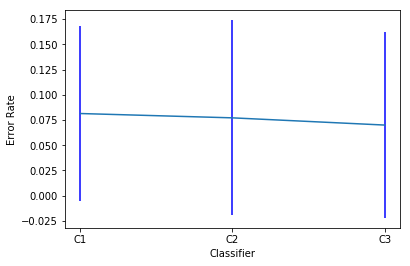

In [27]:
print("Means from classifiers", threeClassifiersMeans)
print("STD's from classifiers", threeClassifiersStd)

from matplotlib import pyplot as plt
x = ["C1","C2","C3"]
y = threeClassifiersMeans
y_err = threeClassifiersStd
plt.errorbar(x, y, yerr=y_err, ecolor='b')
plt.xlabel('Classifier')
plt.ylabel('Error Rate')
plt.show


Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [28]:
def hyperparameter_selection(tr_ind
                            ):
    
        
    """ PSEUDO CODE
    
    PART A
    1. CREATE X WHICH IS A RANDOM SELECTION OF YOUR TRAINING DATA (80 RANDOM)
    2. USING THESE GET THE CLASS NUMBERS
    3. THEN ASSIGN THE .... 0 0 1 IE FOR CLASS 3 . 1 0 0 FOR CLASS 1
    4. THEN TRAIN THIS USING W (NEW TRAINING LABELS)
    5. NOW USING W PREDICT Y OUTPUT ( OF VALIDATION ONES)
    6. THE CLOSEST VALUE TO 1 WILL BE UR CLASS
    7. COMPARE THE ERRORS.
    8. LOOP BACK TO POINT 5
    9. INCREASE LAMBDA EXPONNENTIALLY
    10. PICK BEST LAMBDA
    
    B.1 USING LAMBDA AND THE 200 TRAINING TOTAL
    B.2 COMPARE TIO THE 200 TESTING TOTAL]
    B.4 USING A SIMILAR MATRIX AS STEP A.3
    B,3 GET THE ERROR RATE
  
    Finds the best value for lambda using some method of hyperparameter selection.
    """
    
    
    
    # Store the 200 Training Samples
    tr_data = data[tr_ind, :]
    tr_labels = labels[tr_ind]

    errorDataStore = []

    lamArray = []
    lamErrors = []
    for lam in[2**i for i in range(20)]:
        # Randomly subsample 80 things from the data
        hyp_tr_ind, hyp_validation_ind = partition_data(tr_labels, 2)
 
        


        # Find the labels of these
        # print("Training Labels -----------------")
        hyp_tr_data = data[hyp_tr_ind]
        hyp_tr_labels = labels[hyp_tr_ind]
        # print("Training Labels for creating w: ", hyp_tr_labels)


        # print("Predicted Y Expected -----------------")
        # Now create a predicted output matrix for this 80 x 40 matrix
        ZeroM = np.zeros((80, 40))
        # print("Zero M shape:", ZeroM.shape)
        
        i = 0
        for x in range(80):
            Access = hyp_tr_labels[i] - 1
            ZeroM[x,Access:Access+1] = 1
            i += 1

        # print(ZeroM)

  
        w = l2_rls_train(hyp_tr_data, ZeroM, lam)
        # print(w)

        #  Predict which class it is most likely to be from the other 120 samples
        hyp_validation_data = data[hyp_validation_ind]
        hyp_validation_labels = labels[hyp_validation_ind]
        
        
        hyp_validation_predicted = l2_rls_predict(w,  hyp_validation_data)
        hyp_validation_size = hyp_validation_predicted.shape[0]


        #  Get the maximum value of each predicted output, the column number, save thos
        predictedArray = []
        for x in range(hyp_validation_size):
            predictedColumn = np.argmax(hyp_validation_predicted[x])
            predictedArray.append(predictedColumn + 1)
            # print(predictedColumn)
        
        # print("Calculate Errors -----------------")
        errors = (np.sum(predictedArray != hyp_validation_labels)) / hyp_validation_size
        
        
        # Find out which matrices predicted the wrong class
        errorMatrix = predictedArray != hyp_validation_labels
        

       
    
        
        #  Save the results for hyper parameter selection
        lamErrors.append(errors)
        lamArray.append(lam)
    
    # Find out which pices of data are most common
    # print(errorDataStore.shape)
    

    
    
    
    # print(lamArray)
    # print(lamErrors)
    # print("Selecting the best lambda -----------------")
    bestLambda = lamArray[np.argmin(lamErrors)]
 

    # print("Best Lambda Selected: ", bestLambda)
    return bestLambda

In [32]:
def results(
                            ):
    

    # print("HYPER PARAMATER --------------------")
    # Separate into training and testing
    tr_ind, te_ind = partition_data(labels, 5)
    selectedLambda = hyperparameter_selection(tr_ind)


    # print("RETRAINING THE DATA --------------------")
    trainingData = data[tr_ind, :]
    trainingLabels = labels[tr_ind]

    testingLabels = labels[te_ind]
    newLabels = np.zeros((200, 40))


    i = 0
    for x in range(200):
        Access = testingLabels[i] - 1
        newLabels[x,Access:Access+1] = 1
        i += 1

    w = l2_rls_train(trainingData, newLabels, selectedLambda)


    # print("PREDICTING THE OUTPUT --------------------")
    testingData = data[te_ind]
    ypredict = l2_rls_predict(w, testingData)


    # print("CONVERTING THE RESULT BACK TO LABELS --------------------")
    ypredictSize = ypredict.shape[0]
    #  Get the maximum value of each predicted output, the column number, save thos
    predictedArray = []
    for x in range(ypredictSize):
        predictedColumn = np.argmax(ypredict[x])
        predictedArray.append(predictedColumn + 1)

        # print(predictedColumn)



    ex2Error = np.sum(predictedArray != testingLabels) / ypredictSize


    errorMatrix = (predictedArray != testingLabels) 
    errorFacesIndices = np.where(errorMatrix)[0]
    
    
    
    errorLabels = testingLabels[errorFacesIndices]
    errorCounts = np.bincount(errorLabels)
    errorArgs = np.argmax(errorCounts)
    
    
     # print(errorArgs, "fff")
    return ex2Error, errorArgs, selectedLambda




ERRORS AT: 0.085
USING LAMBDA:  16
Errors Came from 13
Errors Came from 4
Errors Came from 7
Errors Came from 3
Errors Came from 1
Errors Came from 6
Printing Error Subjects


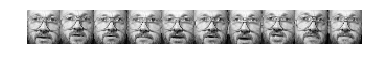

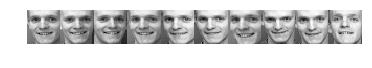

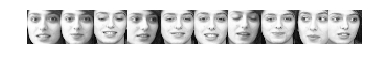

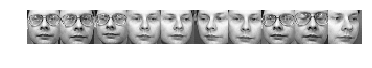

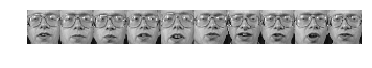

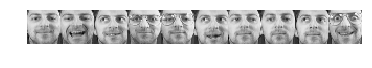

In [38]:
errorLabels = []
errors, errorClass, lambdaV = results()
print("ERRORS AT:", errors)
print("USING LAMBDA: ", lambdaV)

print("Errors Came from", errorClass)

    
np.sort(errorLabels)



errorPoint = errorClass * 10
show_faces(data[errorPoint:errorPoint+10, :], num_per_row=10)

for x in range(5):
    
    errors, errorClass, lambdaV = results()
    errorPoint = errorClass * 10
    print("Errors Came from", errorClass)
    show_faces(data[errorPoint:errorPoint+10, :], num_per_row=10)

print("Printing Error Subjects")



Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [39]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

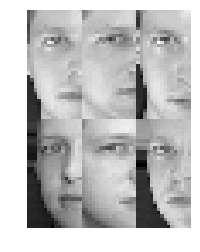

In [40]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [41]:

# Split the data
tr_ind, te_ind = partition_data(labels, 2)

# Separate the training data into left and right
tr_left, tr_right = split_left_right(data[tr_ind])

#Train the data to understand the right side as a weighted output of the left side pixels 
w = l2_rls_train(tr_left, tr_right, 0)

# Use the weights to predict the other side of the face, first split the testing faces
te_left, te_right = split_left_right(data[te_ind])
predicted_right = l2_rls_predict(w,  te_left)
predicted_face = join_left_right(te_left, predicted_right)
actual_faces = join_left_right(te_left, te_right)



Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

Preicted Faces ------------------------


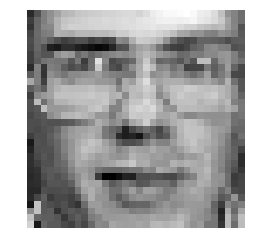

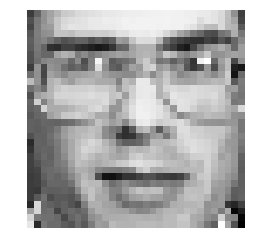

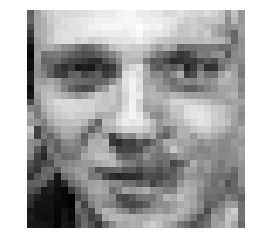

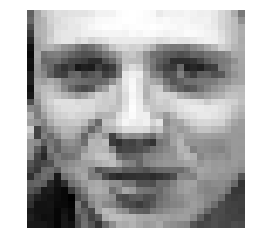

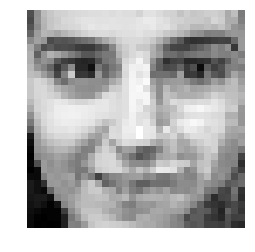

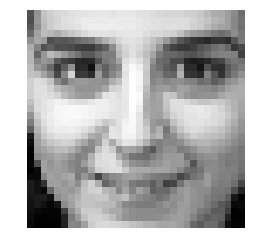

In [42]:
print("Preicted Faces ------------------------")
for x in range(3):
    randomFace = np.random.randint(len(te_ind))
    show_single_face(predicted_face[randomFace:randomFace+1,:])
    show_single_face(actual_faces[randomFace:randomFace+1,:])

    

Does your model work well? Comment on it.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab. Please find the coursework submission instruction from the following link: https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework .

This exercise is worth 15 marks – marks will be allocated roughly on the basis of: 
- rigorous experimentation,
- knowledge displayed when talking to the TA,
- problem solving skill,
- self-learning ability,
- how informative and well presented your graphs are,
- language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| $L_2$-RLS Implementation | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |